# Final Project Submission

Please fill out:
* Student name: **Savannah McAmis**
* Student pace: **Full time**
* Scheduled project review date/time: **Tue, Jun 4, 2019, 1:30 PM EST**
* Instructor name: **Rafael Carrasco**
* Blog post URL: https://medium.com/@savannahmcamis/project-1-multiple-linear-regression-for-house-sales-in-king-county-wa-3128dab77737

# King County House Sales Analysis
# Data Cleaning and Linear Regression

## Table of Contents

1. [Introduction](#Introduction)
* Data Processing
    * [Import libraries and load data](#Import-libraries-and-load-data)
    * [Gather information about the data](#Gather-information)
    * [Replace placeholders](#Replace-placeholders)
    * [Resolve null values](#Resolve-null-values)
    * [Format data types](#Format-data-types)
* Exploratory Data Analysis
    * [Preliminary EDA](#Preliminary-EDA)
    * [Feature engineering](#Feature-engineeering)
    * [Eliminate extraneous features](#Eliminate-extraneous-features)
    * [Remove outliers](#Remove-outliers)
    * [Transform categorical variables](#Transform-categorical-variables)
    * [Question 1 - What effect does waterfront have on price?](#Question-1)
    * [Question 2 - What effect does location have on price?](#Question-2)
    * [Question 3 - What effect does condition have on price?](#Question-3)
* Linear Regression Modeling
    * [Resolve multicollinearity](#Resolve-multicollinearity)
    * [Scale and normalize variables](#Scale-and-normalize-variables)
    * [Partition dataset for testing](#Partition-dataset)
    * [Create a linear regression model](#Create-a-linear-regression-model)
    * [Validate model](#Validate-model)
* [Analysis](#Analysis)
* [Conclusion](#Conclusion)
* [Future work](#Future-work)

## Introduction

As I began this project, I divided it up into roughly 3 steps: data processing, exploratory data analysis, and linear regression modeling with analysis. 

The processing stage consisted of loading my data and libraries, addressing any placeholders and null values, and formatting the data. I investigated 

Once my data was processed, I began my exploratory data analysis. I engineered new features to better understand the trends in the data. I eliminated extraneous features and removed outliers. I also investigated three different features and their relationship to price: waterfront, location, and condition.

After exploring my data, I began my linear regression modeling. I first resolved any multicollinearity between variables. I scaled and normalized the variables that remained. Then I partitioned my dataset for testing and ran my regression model followed by validation testing. I iterated my model a few times and ended up with a model that I thought best predicted housing prices based on the chosen features. 

[Back to the top](#Final-Project-Submission)

## Import libraries and load data

In [216]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set_style('whitegrid')

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

import os

from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')

[Back to the top](#Final-Project-Submission)

## Gather information

In [3]:
df.shape

(21597, 21)

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

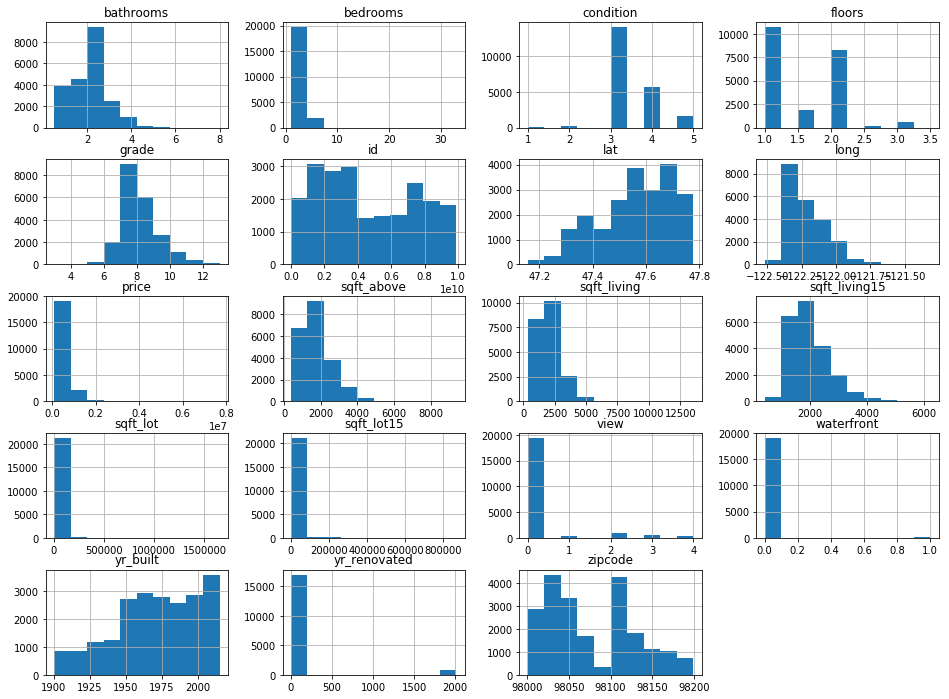

In [11]:
df.hist(figsize=(16,12)) ;

In [7]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [8]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Let's look at a preliminary regression model

In [9]:
y = df['price']
# Take out price, objects, and columns with null values
x = df.drop(['price', 'date', 'sqft_basement', 'waterfront', 'yr_renovated', 'view'], axis=1)
#X = sm.add_constant(x)
linreg = sm.OLS(y, x).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     3003.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:57:49   Log-Likelihood:            -2.9572e+05
No. Observations:               21597   AIC:                         5.915e+05
Df Residuals:                   21582   BIC:                         5.916e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -9.659e-07   5.13e-07     -1.883      0.060   -1.97e-06    3.93e-08
bedrooms      -4.683e+04   2003.587    -23.374      0.000   -5.08e+04   -4.29e+04
bathrooms      4.735e+04   3443.479     13.750      0.000    4.06e+04    5.41e+04
sqft_living     180.2720      4.582     39.347      0.000     171.292     189.252
sqft_lot          0.1450      0.051      2.845      0.004       0.045       0.245
floors         1.348e+04   3764.645      3.581      0.000    6101.521    2.09e+04
condition       2.53e+04   2439.664     10.372      0.000    2.05e+04    3.01e+04
grade          1.034e+05   2279.305     45.361      0.000    9.89e+04    1.08e+05
sqft_above        6.4953      4.514      1.439      0.150      -2.352      15.343
yr_built      -3096.6095     67.880    -45.619      0.000   -3229.660   -2963.559
zipcode        -518.5378     18.971    -27.333      0.000    -555.723    -481.353
lat            5.504e+05   1.13e+04     48.493      0.000    5.28e+05    5.73e+05
long          -2.457e+05   1.39e+04    -17.664      0.000   -2.73e+05   -2.18e+05
sqft_living15    37.5591      3.570     10.520      0.000      30.561      44.557
sqft_lot15       -0.3379      0.078     -4.326      0.000      -0.491      -0.185
==============================================================================
Omnibus:                    19489.941   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1942760.660
Skew:                           3.955   Prob(JB):                         0.00
Kurtosis:                      48.786   Cond. No.                     5.20e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**
* R squared value .661
* Skew 3.955
* Kurtosis 48.786
* Fairly low p values except for sqft_above and id
* Need to clean up the data first

[Back to the top](#Final-Project-Submission)

## Replace placeholders

While examining the data, I noticed '?'s in the column sqft_basement. I will replace the '?'s with null values. I will replace the null values in the following step.

In [10]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [12]:
# Replace placeholders with null values
df.sqft_basement.replace(to_replace='?', value=np.nan, inplace=True)

In [13]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Excellent. Now those 454 placeholders in sqft_basement have been converted to null values. 

[Back to the top](#Final-Project-Submission)

## Resolve null values

The next step is to eliminate our null values. There are several ways to do this. Let's look through the columns with null values. 

In [14]:
# Count of rows with null values
sum([True for idx,row in df.iterrows() if any(row.isnull())])

6168

In [15]:
# Percentage of rows with null values
6168/21597

0.28559522155854977

### Waterfront

Let's examine **waterfront** more closely. 
* Waterfront is a binary variable containing 0s and 1s. I could convert this to a boolean or leave it as a float. Either way, I think it will function the same so I will leave it. 
* I could assume that a null value means no waterfront and replace all nulls with 0. The null values consist of 11% of my data so replacing them with 0s could also skew my data. 
* I could drop all of the rows with null values in waterfront but in doing so I could inadvertently drop important information. 
* The dominant value is 0 so replacing the nulls with 0 would not have a huge effect. Null in a boolean variable defaults to False anyway.
* I could also split waterfront into two columns and look at just the null values.

In [16]:
df.shape

(21597, 21)

In [17]:
# Number of nulls
df.waterfront.isna().sum()

2376

In [18]:
# Percentage of null values in waterfront:
pnw = 2376/21597 * 100
pnw

11.00152798999861

I'm going to create two dataframes: one containing the rows without null values for waterfront and the other containing the rows with null values for waterfront. Then I can use them to look closer at the data.

In [19]:
# Make new dataframe with nulls for waterfront removed
df_w = df[(df.waterfront==df.waterfront)]
df_w.shape

(19221, 21)

In [20]:
# Check
df_w.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [21]:
# Map all properties with nulls for waterfront removed
m_w = folium.Map([df_w['lat'].mean(), df_w['long'].mean()], zoom_start=11)
for index, row in df_w.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        fill_color="#FF0000",
                        fill=True# divvy color
                       ).add_to(m_w)
m_w.save('map_w.html')

In [22]:
# Make new dataframe of just nulls from waterfront
df_nw = df[(df.waterfront != df.waterfront)]
df_nw.shape

(2376, 21)

In [23]:
# Map all properties will null values for waterfront
m_nw = folium.Map([df_nw['lat'].mean(), df_nw['long'].mean()], zoom_start=11)
for index, row in df_nw.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        fill_color="#FF0000",
                        fill=True# divvy color
                       ).add_to(m_nw)
m_nw.save('map_nw.html')

In [24]:
# Make new dataframe of just waterfront properties
df_water = df[df['waterfront'] == 1]
df_water.shape

(146, 21)

In [25]:
# Map all the waterfront properties
m_water = folium.Map([df_water['lat'].mean(), df_water['long'].mean()], zoom_start=11)
for index, row in df_water.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        fill_color="#FF0000",
                        fill=True# divvy color
                       ).add_to(m_water)
m_water.save('map_water.html')

> Open maps in new windows. Crashes jupyter notebook.

Now I can see the properties with null values for waterfront on a map. Overall, they seem to be distributed similarly to our full dataset. The vast majority of properties are not waterfront, but there are still a handful that seem to be on the water. 

### Waterfront

From my analysis above, I am going to **delete the rows containing null values for waterfront**. I think this is an important feature, and I do not want to skew my data.

In [26]:
# Delete rows containing null values for waterfront
df = df.dropna(subset=['waterfront'])

In [27]:
# Check
df.waterfront.isna().sum()

0

### View
Let's examine **view** more closely. 

* View refers to how many times a property has been viewed. It contains values 0, 1, 2, 3, and 4. 
* I could assume a null value in view means it has not been viewed. 
* I could drop all of the rows with null values in view. 
* There are only 63 rows with null values for view.


In [28]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [29]:
df.view.value_counts()

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64

In [30]:
df.view.isna().sum()

57

There are so few rows with null values in view. I'm just going to **delete those rows**. 

In [31]:
# Delete rows containing null values for view
df = df.dropna(subset=['view'])

In [32]:
# Check
df.view.isna().sum()

0

### Sqft_basement
Let's take a closer look at **sqft_basement**.

* This column refers to the size of the basement. 
* I could drop these rows. 
* I could replace them with the mean basement size.
* I could assume they mean no basement and replace them with 0s. 

In [33]:
df.sqft_basement.isna().sum()

415

In [34]:
# Make new dataframe with nulls for sqft_basement removed
df_b = df[df['sqft_basement'] == df['sqft_basement']]

In [35]:
df_b.sqft_basement.isna().sum()

0

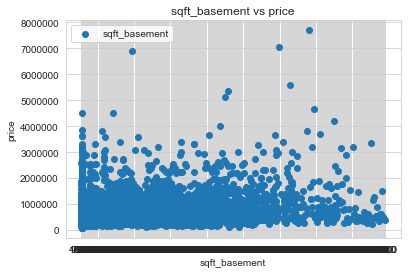

In [36]:
plt.scatter(df_b['sqft_basement'], df_b['price'], label='sqft_basement')
plt.title('sqft_basement vs price')
plt.legend()
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.show()

Sqft_basement does not seem to have much relationship to the price of a house. For that reason, I am going to **replace the null values with 0**. I am not worried about skewing my data because I probably won't use it anyway.

In [37]:
# Replace null values with 0
df.sqft_basement.replace(to_replace=np.nan, value=0.0, inplace=True)

In [38]:
# Check
df.sqft_basement.isna().sum()

0

### Yr_renovated
Let's take a closer look at **yr_renovated**.

* This is the year that the house was renovated.
* I could drop the rows but then I would lose a lot of data. 
* I could assume null value means the house has not been renovated. 
* I don't think it would be appropriate to put another value in these cells.
* I am going to replace null values with 0s because I don't think it will negatively impact my data too much. 


In [39]:
df.yr_renovated.isna().sum()

3402

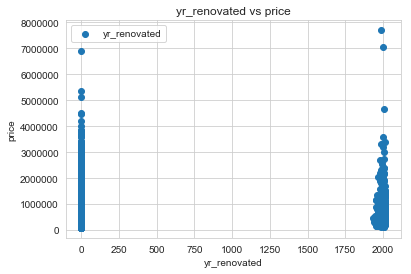

In [40]:
plt.scatter(df['yr_renovated'], df['price'], label='yr_renovated')
plt.title('yr_renovated vs price')
plt.legend()
plt.xlabel('yr_renovated')
plt.ylabel('price')
plt.show()

In [41]:
df.yr_renovated.value_counts()

0.0       15111
2014.0       64
2013.0       29
2005.0       27
2000.0       25
2007.0       24
2003.0       24
1990.0       22
2009.0       19
2006.0       18
2004.0       18
1989.0       17
2002.0       15
1998.0       15
2008.0       15
1984.0       14
2010.0       14
2001.0       14
1987.0       13
1999.0       13
1994.0       13
1991.0       13
2015.0       13
1997.0       12
1992.0       12
1983.0       11
1986.0       11
1985.0       11
1993.0       11
1988.0       10
          ...  
1975.0        5
1968.0        5
1969.0        4
1973.0        4
1960.0        3
1978.0        3
1958.0        3
1965.0        3
1972.0        3
1956.0        3
1981.0        3
1963.0        3
1945.0        2
1940.0        2
1957.0        2
1955.0        2
1946.0        1
1951.0        1
1944.0        1
1976.0        1
1934.0        1
1974.0        1
1962.0        1
1967.0        1
1948.0        1
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Leng

Yr_renovated does not seem to have much relationship to the price of a house. For that reason, I am going to **replace the null values with 0**. I am not worried about skewing my data because I probably won't use it anyway.

In [42]:
# Replace null values in yr_renovated with 0
df.yr_renovated.replace(to_replace=np.nan, value=0.0, inplace=True)

In [43]:
#Check
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [44]:
df.isna().any().any()

False

[Back to the top](#Final-Project-Submission)

## Format data types

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
id               19164 non-null int64
date             19164 non-null object
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
sqft_basement    19164 non-null object
yr_built         19164 non-null int64
yr_renovated     19164 non-null float64
zipcode          19164 non-null int64
lat              19164 non-null float64
long             19164 non-null float64
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.2+ MB


The next step is to format the data types. All of the columns are either int or float except for date and sqft_basement. Date should be type datetime so we can use it for modeling later. Column sqft_basement should be int for consistency with the other sqft variables. Also column waterfront should be boolean.

In [46]:
pd.to_datetime(df['date'], format='%m/%d/%Y').head()

1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
5   2014-05-12
Name: date, dtype: datetime64[ns]

In [47]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [48]:
df['sqft_basement'] = df['sqft_basement'].astype('float64').astype('int64')

In [49]:
#df['waterfront'] = df['waterfront'].astype('bool')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
id               19164 non-null int64
date             19164 non-null datetime64[ns]
price            19164 non-null float64
bedrooms         19164 non-null int64
bathrooms        19164 non-null float64
sqft_living      19164 non-null int64
sqft_lot         19164 non-null int64
floors           19164 non-null float64
waterfront       19164 non-null float64
view             19164 non-null float64
condition        19164 non-null int64
grade            19164 non-null int64
sqft_above       19164 non-null int64
sqft_basement    19164 non-null int64
yr_built         19164 non-null int64
yr_renovated     19164 non-null float64
zipcode          19164 non-null int64
lat              19164 non-null float64
long             19164 non-null float64
sqft_living15    19164 non-null int64
sqft_lot15       19164 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(12)
memory usage: 3.2 M

[Back to the top](#Final-Project-Submission)

## Exploratory Data Analysis

## Preliminary EDA

Let's look through the variables in our dataset. 
* **Continuous variables** - 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'lat', 'long'
* **Discrete variables** - 'bedrooms', 'bathrooms', 'floors', 'yr_built', 'yr_renovated', 'view'
* **Categorical variables** - 'condition', 'grade', 'zipcode'
* **Boolean variables** - 'waterfront'
* **Unimportant variables** - 'id'

The continuous variables will need to be scaled and normalized. The discrete variables can all be treated as continuous variables. The categorical variables will need to be binned and one-hot encoded before modeling. The binary variables will be ignored for now. Finally, the unimportant variables will be removed. 

In [51]:
abs(df.corr() > .7)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


[Back to the top](#Final-Project-Submission)

## Feature engineering

Let's create some new columns to describe our data.
* total_sqft_inside = sqft_above + sqft_basement
* total_sqft = sqft_living + sqft_lot
* last_updated = greater of (yr_built, yr_renovated)
* year_sold = df['date'].dt.year
* age_when_sold = yr_sold - yr_built
* age_since_renovated = yr_sold - last_updated

In [52]:
# Create yr_sold column
df['yr_sold'] = df['date'].dt.year
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930,2014


In [53]:
# Create age_when_sold column
df['age_when_sold'] = df['yr_sold'] - df['yr_built']
df.age_when_sold.unique()

array([ 63,  82,  49,  28,  13,  19,  55,  12,  72,  87,  37, 115,  36,
        20,  98,  93,  46,  67,  29,  73,  99, 105,  66,  10,  11,   9,
        85,  33,  84,  81, 110,  18,  30,   0,  92,  62,  59,  64,  34,
        88,   6,  24,  60,  35,  89,  41,  43,  50,  58,  74,  22,  51,
        53,   8,  26,  14,  75,  68,  48,  39, 104,  31, 114,   4,  69,
        90,  27, 101,  25,  54, 109,   7,  47,  52,  15,  38,  16,  61,
       113,  21,  94,  45, 100, 111,  96,  97,  86, 103,  78,  77, 107,
        40,  57, 102,  17,  71,   1,  23,  91,  42,  65,  95,  32,   3,
        56,  44, 112,   5,  70,   2,  80,  76,  83, 106, 108,  79,  -1])

In [54]:
# Create total_sqft_inside column
df['total_sqft_inside'] = df['sqft_above'] + df['sqft_basement']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,age_when_sold,total_sqft_inside
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,2570
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,770
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,1960
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,1680
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13,5420


In [55]:
# Create total_sqft column
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,age_when_sold,total_sqft_inside,total_sqft
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,2570,9812
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,770,10770
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,1960,6960
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,1680,9760
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13,5420,107350


In [56]:
# Create last_updated column
df['last_updated'] = np.nan
df.loc[df['yr_renovated'] > df['yr_built'], 'last_updated'] = df['yr_renovated']
df.loc[df['yr_renovated'] <= df['yr_built'], 'last_updated'] = df['yr_built']  
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,age_when_sold,total_sqft_inside,total_sqft,last_updated
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,2570,9812,1991.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,770,10770,1933.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,1960,6960,1965.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,1680,9760,1987.0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13,5420,107350,2001.0


In [57]:
# Create age_since_updated column
df['age_since_updated'] = df['yr_sold'] - df['last_updated']
df['age_since_updated'].values[df['age_since_updated'].values <= 0] = 0.1

In [58]:
df['age_since_updated'].unique()

array([2.30e+01, 8.20e+01, 4.90e+01, 2.80e+01, 1.30e+01, 1.90e+01,
       5.50e+01, 1.20e+01, 7.20e+01, 8.70e+01, 3.70e+01, 1.15e+02,
       3.60e+01, 2.00e+01, 9.80e+01, 9.30e+01, 4.60e+01, 6.70e+01,
       2.90e+01, 7.30e+01, 9.90e+01, 1.05e+02, 6.60e+01, 1.00e+01,
       1.10e+01, 9.00e+00, 8.50e+01, 3.30e+01, 8.10e+01, 1.10e+02,
       1.80e+01, 3.00e+01, 1.00e-01, 9.20e+01, 6.20e+01, 5.90e+01,
       6.40e+01, 3.40e+01, 8.80e+01, 6.00e+00, 2.40e+01, 6.00e+01,
       3.50e+01, 8.90e+01, 4.10e+01, 4.30e+01, 5.00e+01, 5.80e+01,
       7.40e+01, 2.20e+01, 5.10e+01, 5.30e+01, 8.00e+00, 2.60e+01,
       1.40e+01, 7.50e+01, 4.80e+01, 3.90e+01, 1.04e+02, 3.10e+01,
       4.00e+00, 1.14e+02, 6.90e+01, 9.00e+01, 2.70e+01, 2.50e+01,
       5.40e+01, 1.09e+02, 7.00e+00, 6.80e+01, 4.70e+01, 1.00e+00,
       5.20e+01, 1.50e+01, 3.80e+01, 1.60e+01, 6.10e+01, 1.13e+02,
       2.10e+01, 9.40e+01, 4.50e+01, 1.00e+02, 9.60e+01, 9.70e+01,
       8.60e+01, 1.03e+02, 7.80e+01, 7.70e+01, 1.07e+02, 8.40e

In [59]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,age_when_sold,total_sqft_inside,total_sqft,last_updated,age_since_updated
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63,2570,9812,1991.0,23.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82,770,10770,1933.0,82.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49,1960,6960,1965.0,49.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28,1680,9760,1987.0,28.0
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930,2014,13,5420,107350,2001.0,13.0


In [60]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'age_when_sold', 'total_sqft_inside', 'total_sqft', 'last_updated',
       'age_since_updated'],
      dtype='object')

[Back to the top](#Final-Project-Submission)

## Eliminate extraneous features

Let's eliminate some of the columns that we definitely won't use in the regression model.

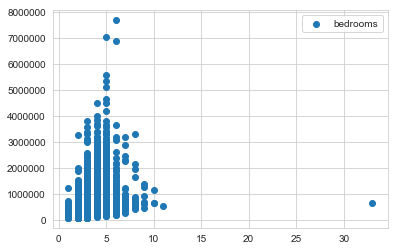

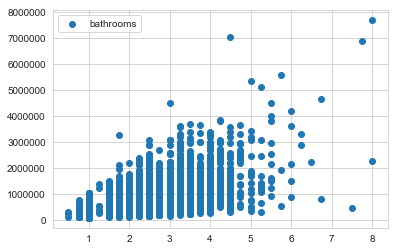

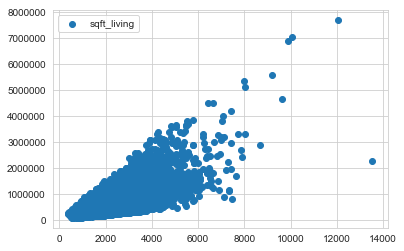

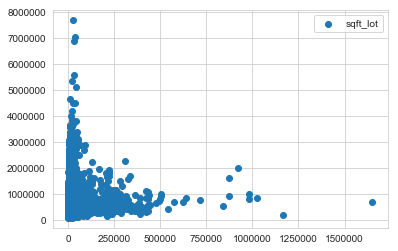

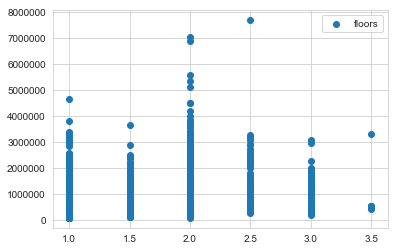

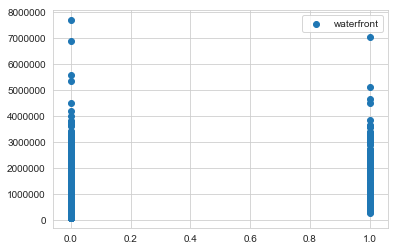

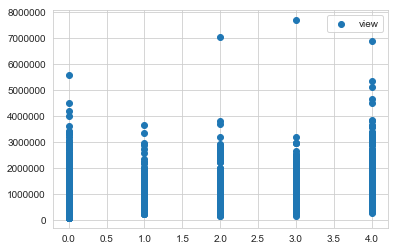

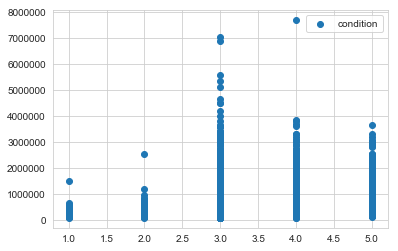

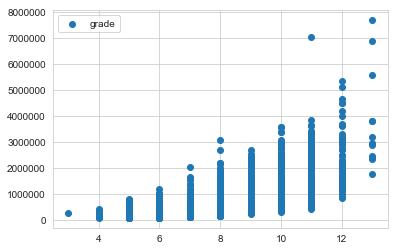

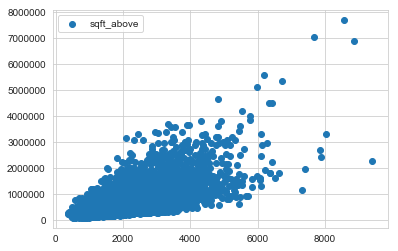

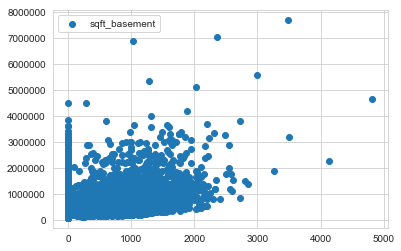

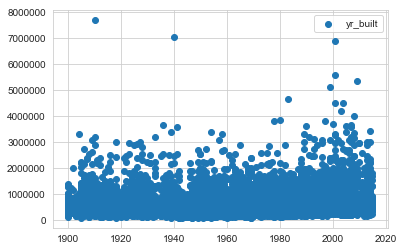

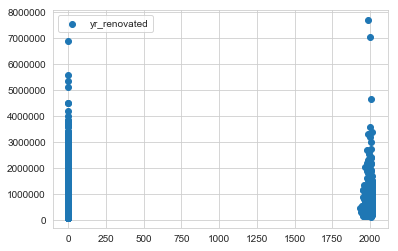

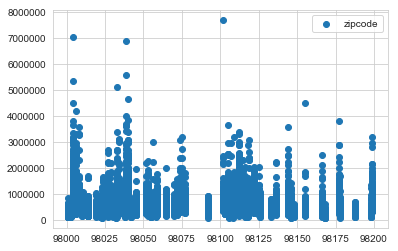

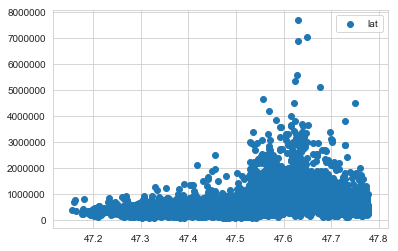

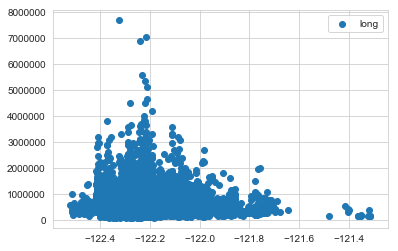

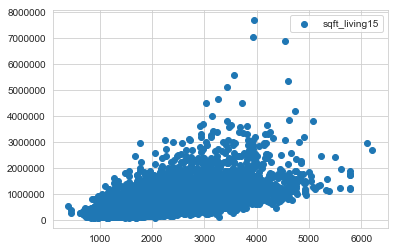

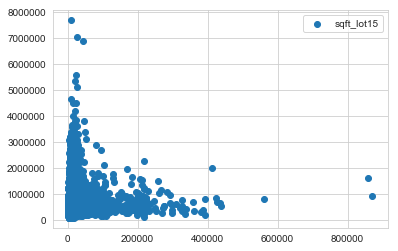

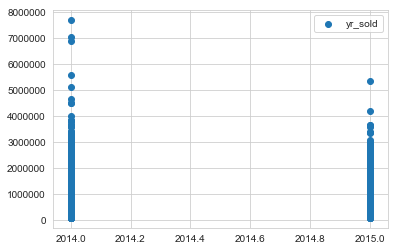

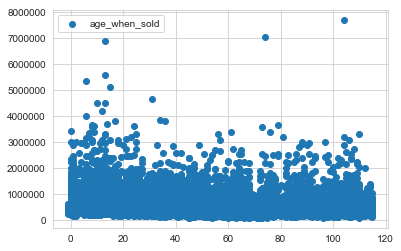

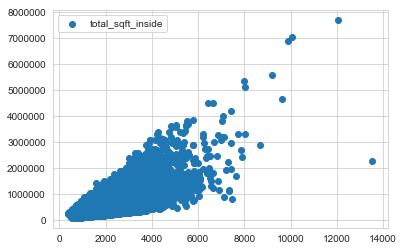

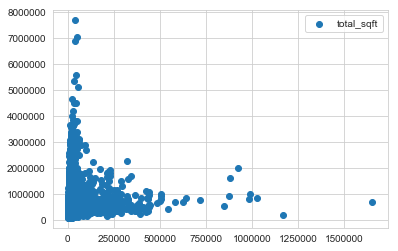

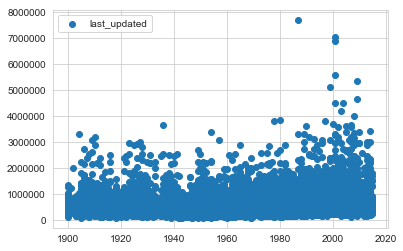

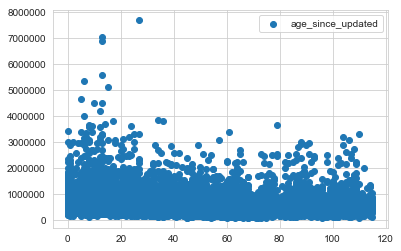

In [61]:
# Check linearity assumption with scatter plots
data = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'age_when_sold', 'total_sqft_inside', 'total_sqft', 'last_updated',
       'age_since_updated']

for column in data:
    plt.scatter(df[column], df.price, label=column)
    plt.legend()
    plt.show()

From these scatter plots, I can determine which columns have linear relationships with price and eliminate the others. 

I will delete sqft_lot, floors, view, sqft_basement, yr_built, yr_renovated, zipcode, sqft_lot15, yr_sold, age_when_sold, total_sqft, and last_updated.

I will keep bedrooms, bathrooms, sqft_living, waterfront, condition, grade, sqft_above, lat, long, sqft_living15, total_sqft_inside, and age_since_updated.

In [62]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'age_when_sold', 'total_sqft_inside', 'total_sqft', 'last_updated',
       'age_since_updated'],
      dtype='object')

In [63]:
df2 = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'yr_sold',
               'last_updated'], axis=1)
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age_when_sold', 'total_sqft_inside', 'total_sqft',
       'age_since_updated'],
      dtype='object')

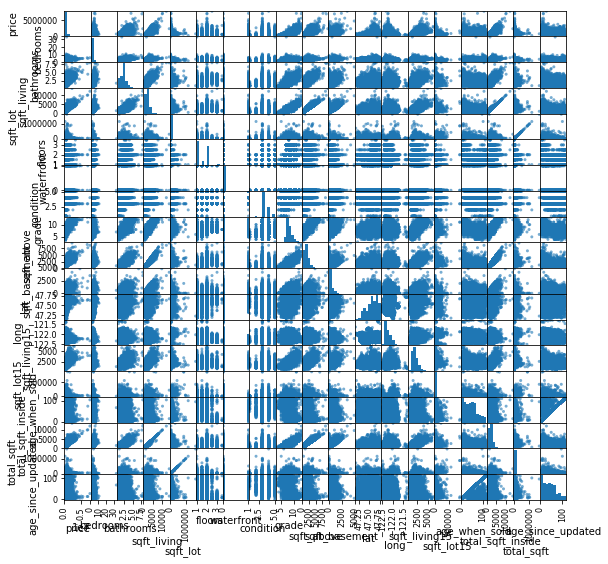

In [72]:
# This takes a really long time and sometimes crashes
pd.plotting.scatter_matrix(df2,figsize  = [9, 9], diagonal='hist', alpha=0.6);

In [64]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_when_sold,total_sqft_inside,total_sqft,age_since_updated
count,1.916400e+04,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000
mean,5.414490e+05,3.374452,2.117029,2082.038301,1.506174e+04,1.495173,0.007566,0.231058,3.409987,7.660718,1791.425433,284.380662,98077.726466,47.560018,-122.214011,1987.221874,12797.653882,43.282091,2075.806095,1.714378e+04,41.363677
std,3.709009e+05,0.928676,0.769241,921.918226,4.077215e+04,0.540308,0.086657,0.763368,0.650456,1.175601,831.776073,439.443059,53.448716,0.138661,0.140728,684.787028,27552.634083,29.389697,921.149889,4.094228e+04,28.972579
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,370.000000,1.452000e+03,0.100000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,1420.000000,7.032000e+03,16.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.572000,-122.231000,1840.000000,7620.000000,39.000000,1910.000000,9.578000e+03,37.000000
75%,6.439625e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2217.750000,540.000000,98117.000000,47.678100,-122.125000,2360.000000,10093.250000,63.000000,2550.000000,1.301000e+04,61.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,13540.000000,1.652659e+06,115.000000


I still need to remove outliers. That will come soon.

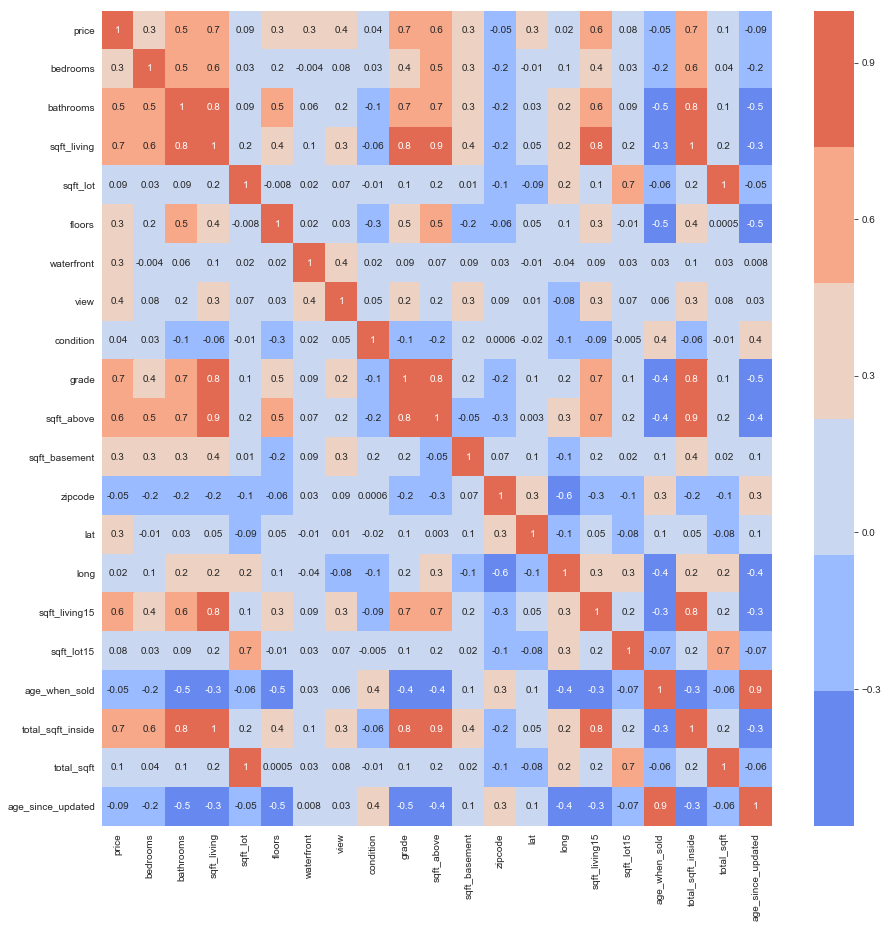

In [65]:
# Let's look at a heatmap of the covariance
corr = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

Columns with a high correlation to price include sqft_living, grade, and total_sqft_inside. Columns sqft_living, total_sqft_inside and grade are also correlated to each other. I will handle multicollinearity soon.

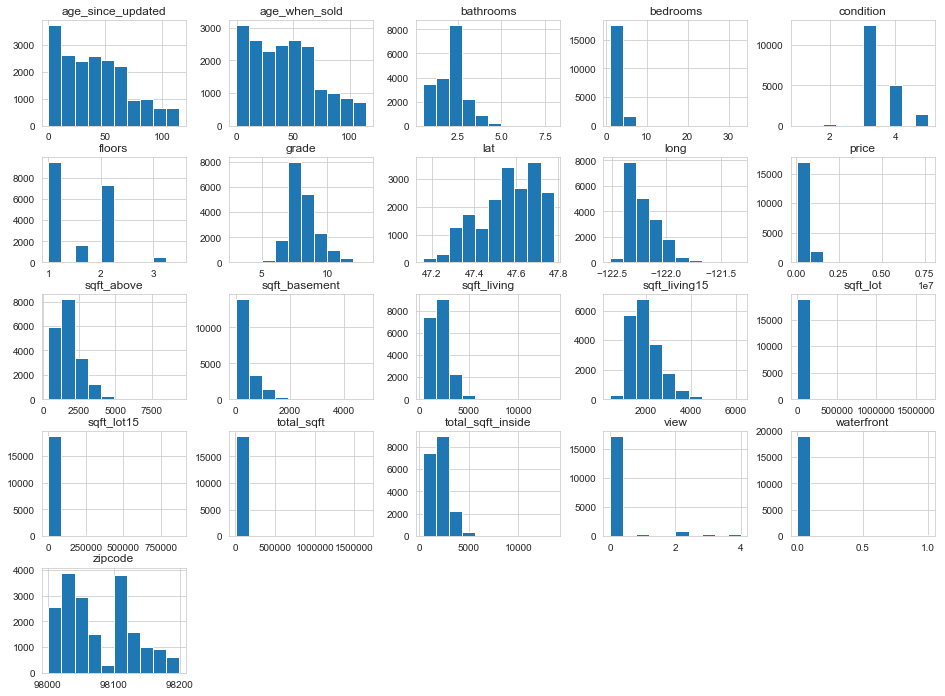

In [66]:
df2.hist(figsize=(16,12)) ;

I will need to transform my categorical values.

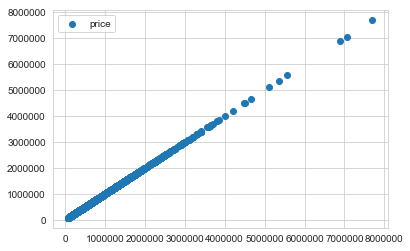

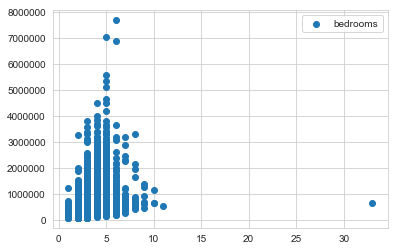

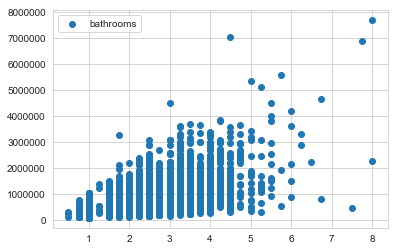

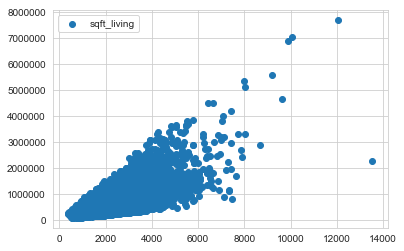

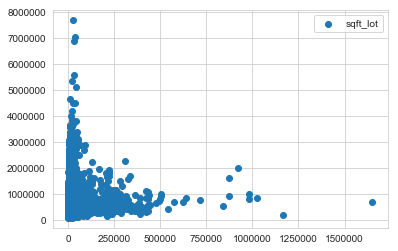

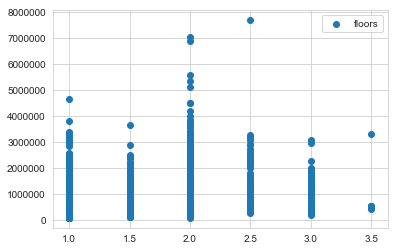

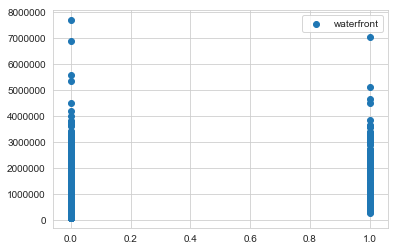

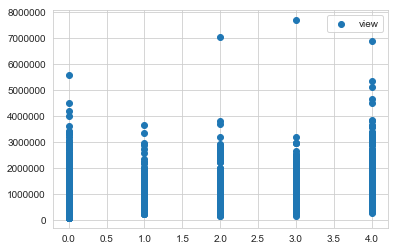

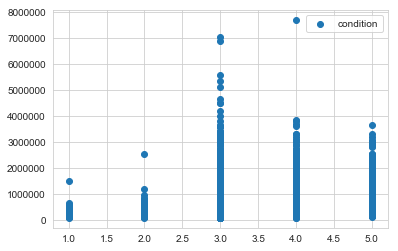

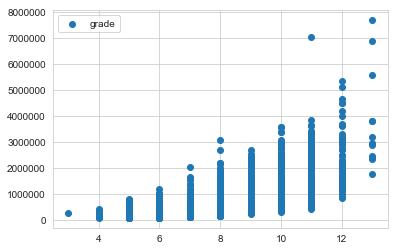

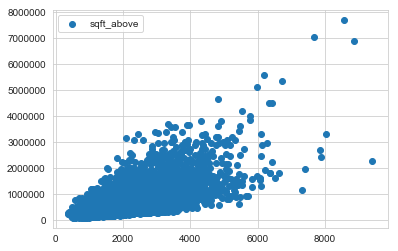

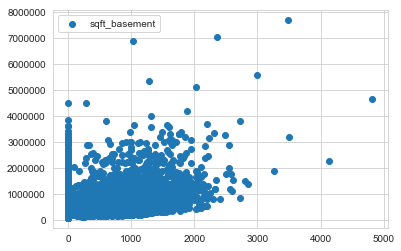

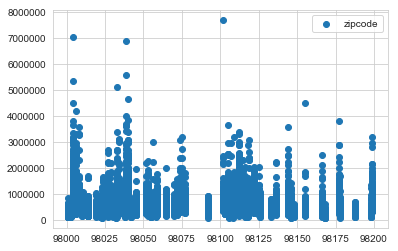

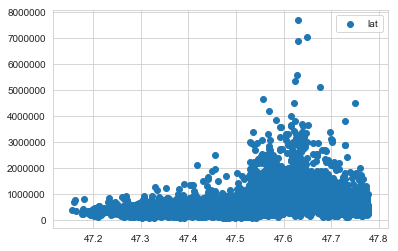

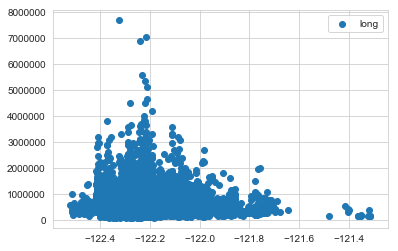

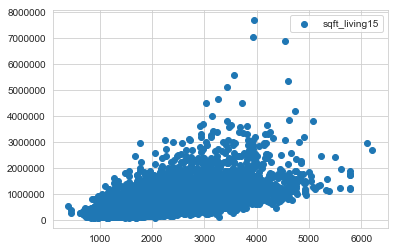

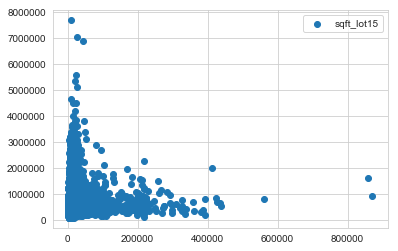

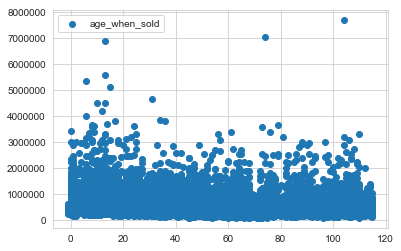

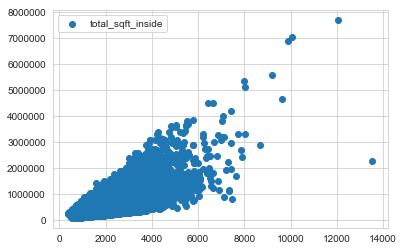

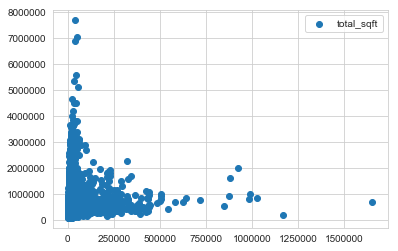

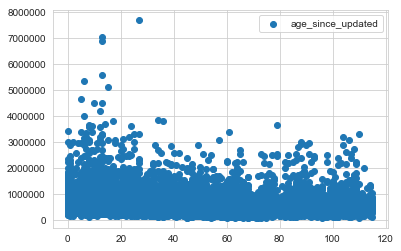

In [75]:
target = df2.price
for column in df2.columns:
    plt.scatter(df2[column], target, label=column)
    plt.legend()
    plt.show()

[Back to the top](#Final-Project-Submission)

## Remove outliers

Several of my columns have outliers. I want to write a function that will easily remove the outliers from each column. I'm going to use the interquartile range of the column to detect lower and upper bounds, then remove any points that fall outside those bounds. I will remove all points more than 2 standard deviations from the mean. 

In [76]:
def remove_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound  = q1 - (2 * iqr)
    upper_bound = q3 + (2 * iqr)
    out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return out_df

In [77]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age_when_sold', 'total_sqft_inside', 'total_sqft',
       'age_since_updated'],
      dtype='object')

In [78]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_when_sold,total_sqft_inside,total_sqft,age_since_updated
count,1.916400e+04,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,19164.000000,1.916400e+04,19164.000000
mean,5.414490e+05,3.374452,2.117029,2082.038301,1.506174e+04,1.495173,0.007566,0.231058,3.409987,7.660718,1791.425433,284.380662,98077.726466,47.560018,-122.214011,1987.221874,12797.653882,43.282091,2075.806095,1.714378e+04,41.363677
std,3.709009e+05,0.928676,0.769241,921.918226,4.077215e+04,0.540308,0.086657,0.763368,0.650456,1.175601,831.776073,439.443059,53.448716,0.138661,0.140728,684.787028,27552.634083,29.389697,921.149889,4.094228e+04,28.972579
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,370.000000,1.452000e+03,0.100000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,1420.000000,7.032000e+03,16.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.572000,-122.231000,1840.000000,7620.000000,39.000000,1910.000000,9.578000e+03,37.000000
75%,6.439625e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2217.750000,540.000000,98117.000000,47.678100,-122.125000,2360.000000,10093.250000,63.000000,2550.000000,1.301000e+04,61.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,13540.000000,1.652659e+06,115.000000


**bedrooms** clearly has some outliers. Let's test the function on that.

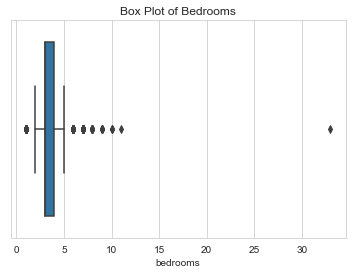

In [79]:
sns.boxplot(x=df2['bedrooms']).set_title('Box Plot of Bedrooms') ;

In [80]:
df2 = remove_outlier(df2, 'bedrooms')

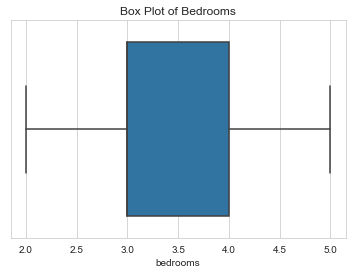

In [81]:
sns.boxplot(x=df2['bedrooms']).set_title('Box Plot of Bedrooms') ;

In [82]:
df2 = remove_outlier(df2, 'sqft_lot')

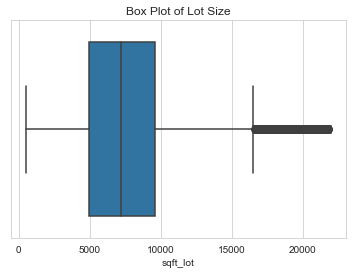

In [83]:
sns.boxplot(x=df2['sqft_lot']).set_title('Box Plot of Lot Size') ;

In [84]:
df2 = remove_outlier(df2, 'sqft_lot15')

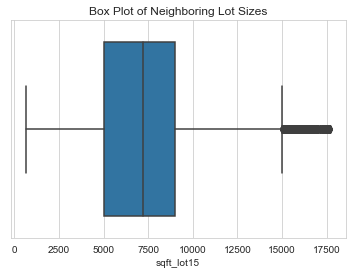

In [85]:
sns.boxplot(x=df2['sqft_lot15']).set_title('Box Plot of Neighboring Lot Sizes') ;

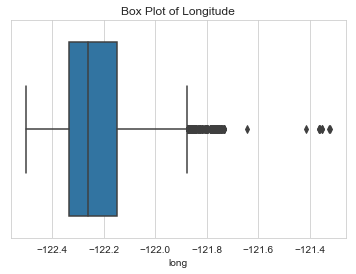

In [86]:
sns.boxplot(x=df2['long']).set_title('Box Plot of Longitude') ;

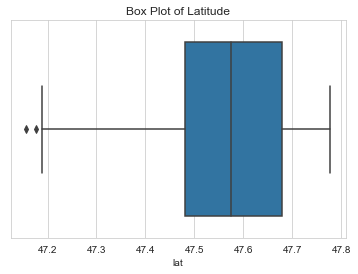

In [87]:
sns.boxplot(x=df2['lat']).set_title('Box Plot of Latitude') ;

In [88]:
df2 = remove_outlier(df2, 'long')

In [89]:
df2 = remove_outlier(df2, 'lat')

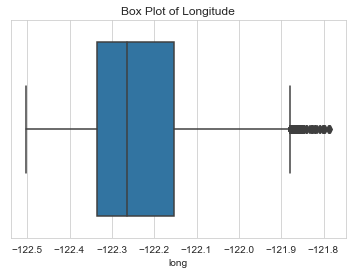

In [90]:
sns.boxplot(x=df2['long']).set_title('Box Plot of Longitude') ;

In [91]:
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_when_sold,total_sqft_inside,total_sqft,age_since_updated
count,1.638200e+04,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000
mean,5.155945e+05,3.329508,2.075235,1985.477170,7355.434562,1.494201,0.003968,0.198327,3.412282,7.581553,1705.778476,274.095349,98080.828043,47.562858,-122.230745,1915.266756,7153.541936,43.713832,1979.873825,9340.911732,41.852771
std,3.160177e+05,0.801885,0.727018,809.415974,3677.205602,0.547090,0.062867,0.697289,0.650867,1.076539,735.350401,414.214514,54.087096,0.136627,0.125561,630.291515,3161.678554,30.056369,809.792088,3973.101692,29.662303
min,7.800000e+04,2.000000,0.500000,520.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,480.000000,0.000000,98001.000000,47.177500,-122.503000,620.000000,651.000000,-1.000000,520.000000,1452.000000,0.100000
25%,3.150000e+05,3.000000,1.500000,1400.000000,4871.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,98033.000000,47.481500,-122.335000,1460.000000,5000.000000,16.000000,1390.000000,6678.000000,14.000000
50%,4.400000e+05,3.000000,2.250000,1840.000000,7200.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,98074.000000,47.574800,-122.264000,1780.000000,7210.000000,41.000000,1840.000000,9030.000000,38.000000
75%,6.200000e+05,4.000000,2.500000,2420.000000,9329.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2090.000000,530.000000,98118.000000,47.679200,-122.153000,2250.000000,8993.500000,64.000000,2420.000000,11363.000000,62.000000
max,4.670000e+06,5.000000,6.750000,9640.000000,21883.000000,3.500000,1.000000,4.000000,5.000000,13.000000,6110.000000,4820.000000,98199.000000,47.777600,-121.784000,5790.000000,17707.000000,115.000000,9640.000000,25818.000000,115.000000


That looks much better!

[Back to the top](#Final-Project-Submission)

## Transform categorical variables

While there are no obvious categorical variables (such as those stored as strings), there are **ordinal variables**. These ordinal variables include condition and grade. I will tranform these columns with one-hot encoding. 

In [92]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age_when_sold', 'total_sqft_inside', 'total_sqft',
       'age_since_updated'],
      dtype='object')

In [93]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_when_sold,total_sqft_inside,total_sqft,age_since_updated
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,2570,9812,23.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,770,10770,82.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,1960,6960,49.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,1680,9760,28.0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0,98003,47.3097,-122.327,2238,6819,19,1715,8534,19.0


### Create bins

In [94]:
df_bins = df2

#### Grade

Instead of trying to transform grade and getting a bunch of extra columns, I'm just going to drop grade.

In [95]:
# df2 = df2.drop(['grade'], axis=1)

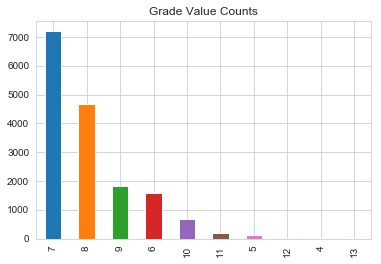

In [96]:
df_bins.grade.value_counts().plot(kind='bar').set_title('Grade Value Counts') ;

In [97]:
# First, create bins for based on the values observed
# 8 values will result in 7 bins
bins = [0, 5, 6, 7, 8, 9, 10, 13]
# use pd.cut
bins_grade = pd.cut(df_bins['grade'], bins)

In [98]:
# Using pd.cut returns unordered categories. 
# Transform this to ordered categories.
bins_grade = bins_grade.cat.as_unordered()
bins_grade.head()

1    (6, 7]
2    (5, 6]
3    (6, 7]
4    (7, 8]
6    (6, 7]
Name: grade, dtype: category
Categories (7, interval[int64]): [(0, 5], (5, 6], (6, 7], (7, 8], (8, 9], (9, 10], (10, 13]]

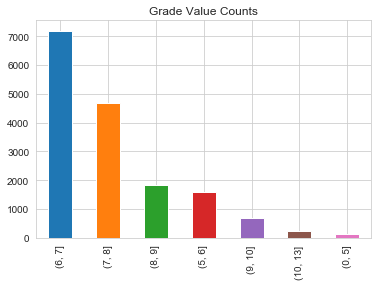

In [99]:
# Inspect the result
bins_grade.value_counts().plot(kind='bar').set_title('Grade Value Counts') ;

#### Condition

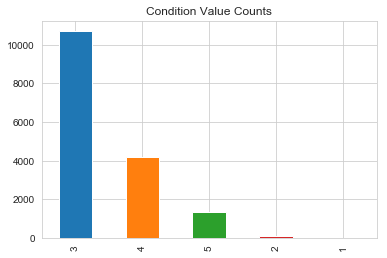

In [100]:
df_bins.condition.value_counts().plot(kind='bar').set_title('Condition Value Counts') ;

In [101]:
# First, create bins for based on the values observed
# 5 values will result in 4 bins
bins = [0, 2, 3, 5]
# use pd.cut
bins_condition = pd.cut(df_bins['condition'], bins)
bins_condition.head()

1    (2, 3]
2    (2, 3]
3    (3, 5]
4    (2, 3]
6    (2, 3]
Name: condition, dtype: category
Categories (3, interval[int64]): [(0, 2] < (2, 3] < (3, 5]]

In [102]:
# Using pd.cut returns unordered categories. 
# Transform this to ordered categories.
bins_condition = bins_condition.cat.as_unordered()
bins_condition.head()

1    (2, 3]
2    (2, 3]
3    (3, 5]
4    (2, 3]
6    (2, 3]
Name: condition, dtype: category
Categories (3, interval[int64]): [(0, 2], (2, 3], (3, 5]]

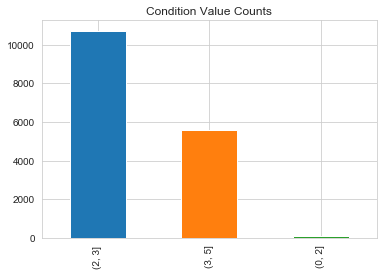

In [103]:
# Inspect the result
bins_condition.value_counts().plot(kind='bar').set_title('Condition Value Counts') ;

### Set up dummy variables

In [104]:
# Set up dummy variable
grade_dummies = pd.get_dummies(bins_grade, prefix="grade",
                              drop_first=True)
condition_dummies = pd.get_dummies(bins_condition, 
                                   prefix="condition", 
                                   drop_first=True)

In [105]:
condition_dummies.head()

,"condition_(2, 3]","condition_(3, 5]"
1,1,0
2,1,0
3,0,1
4,1,0
6,1,0


In [106]:
grade_dummies.head()

,"grade_(5, 6]","grade_(6, 7]","grade_(7, 8]","grade_(8, 9]","grade_(9, 10]","grade_(10, 13]"
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
6,0,1,0,0,0,0


In [107]:
# Drop the original column and put in our dummy column
df_bins = df_bins.drop(['condition', 'grade'], axis=1)

In [108]:
df_bins = pd.concat([df_bins, condition_dummies, grade_dummies], axis=1)
df_bins.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_when_sold,total_sqft_inside,total_sqft,age_since_updated,"condition_(2, 3]","condition_(3, 5]","grade_(5, 6]","grade_(6, 7]","grade_(7, 8]","grade_(8, 9]","grade_(9, 10]","grade_(10, 13]"
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,400,98125,47.7210,-122.319,1690,7639,63,2570,9812,23.0,1,0,0,1,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,770,0,98028,47.7379,-122.233,2720,8062,82,770,10770,82.0,1,0,1,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,910,98136,47.5208,-122.393,1360,5000,49,1960,6960,49.0,0,1,0,1,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,0,98074,47.6168,-122.045,1800,7503,28,1680,9760,28.0,1,0,0,0,1,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,1715,0,98003,47.3097,-122.327,2238,6819,19,1715,8534,19.0,1,0,0,1,0,0,0,0


In [109]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_when_sold,total_sqft_inside,total_sqft,age_since_updated
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,2570,9812,23.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,770,10770,82.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,1960,6960,49.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,1680,9760,28.0
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0,98003,47.3097,-122.327,2238,6819,19,1715,8534,19.0


**All categorical variables have been transformed!**

[Back to the top](#Final-Project-Submission)

# Question 1
## What effect does waterfront have on price?

Waterfront properties account for a small portion of the house sales in King County. Nevertheless, it seems to have a sizable impact on price. When I created the map of house prices, I noticed that waterfront properties are consistently in the upper quartile of prices. While it might not be statistically significant, I'm interested enough to explore this question more deeply. 

> Reminder: The difference between df and df2 are features removed and outliers.

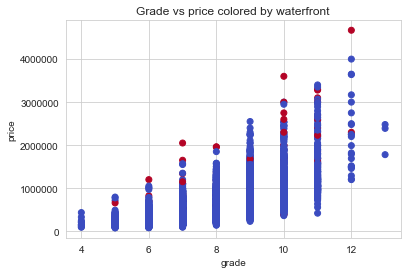

In [114]:
plt.scatter(df2['grade'], df2['price'], c=df2['waterfront'], 
            cmap='coolwarm')
plt.title('Grade vs price colored by waterfront')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

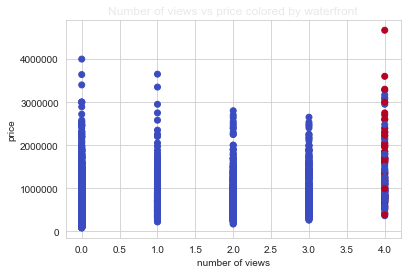

In [115]:
plt.scatter(df2['view'], df2['price'], c=df2['waterfront'], 
            cmap='coolwarm')
plt.title('Number of views vs price colored by waterfront', alpha=0.1)
plt.xlabel('number of views')
plt.ylabel('price')
plt.show()

In [116]:
df['view'].value_counts()

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64

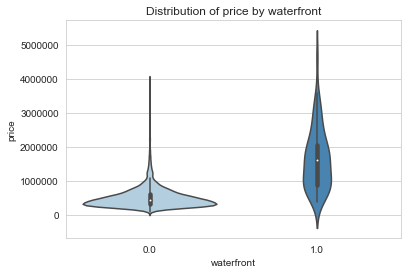

In [117]:
# Violin plot of waterfront vs price
sns.violinplot(x=df2['waterfront'], y=df2['price'], 
               palette="Blues").set_title('Distribution of price by waterfront') ;

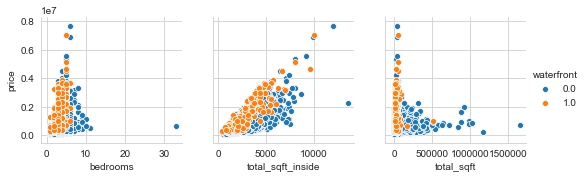

In [118]:
#Visualizing the data with outliers
sns.pairplot(df, 
             x_vars=["bedrooms", "total_sqft_inside", "total_sqft"], 
             y_vars=["price"],
             hue = "waterfront") ;

> I can't figure out how to get titles on these pair plots

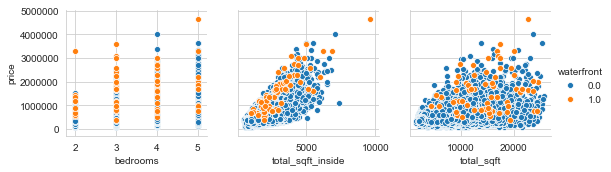

In [119]:
#Visualizing the data without outliers
sns.pairplot(df2, 
             x_vars=["bedrooms", "total_sqft_inside", "total_sqft"], 
             y_vars=["price"],
             hue = "waterfront") ;

### Question 1 Conclusions

Clearly demand for waterfront properties is very high. The vast majority of properties were viewed 0 times; however, most waterfront properties were viewed 4 times. This leads me to believe that there are a lot of buyers in the market looking for waterfront properties. High demand drives up price. The violin plot shows that waterfront properties tend to have a wider distribution of prices and are generally more expensive.

Waterfront properties are some of the most expensive in relation to their size. In the pairplot visualization above, the yellow dots represent waterfront properties. We can see that waterfront properties generally sell for a higher price compared to other houses of similar size. Waterfront properties are generally not the largest of the houses in King County, but they are usually on the upper end of the price scale for their size. Waterfront properties also tend to have smaller lot sizes than other houses in the same price range. 

[Back to the top](#Final-Project-Submission)

# Question 2

## What effect does location have on price?

I'm going to create a map of King County with all house sales marked and color coded based on price. I want to see trends in the locations of the most expensive houses. I also want to make a map of the density of house sales to see which areas are the most populated.

In [181]:
m = folium.Map([df2['lat'].mean(), df2['long'].mean()], 
               zoom_start=11)

In [182]:
for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=3,
                        fill_color="#000000",
                        fill=True# divvy color
                       ).add_to(m)
m.save('map.html')

In [225]:
df2['price'].describe()

count    1.638200e+04
mean     5.155945e+05
std      3.160177e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.400000e+05
75%      6.200000e+05
max      4.670000e+06
Name: price, dtype: float64

In [226]:
Q1_priced_houses = df2.loc[df2['price'] < 315000]
Q2_priced_houses = df2.loc[(df2['price'] >= 315000) & (df2['price'] < 440000)]
Q3_priced_houses = df2.loc[(df2['price'] >= 440000) & (df2['price'] < 620000)]
Q4_priced_houses = df2.loc[df2['price'] >= 620000]

In [227]:
min_lat=min(df2.lat)
max_lat=max(df2.lat)
min_lon=min(df2.long)
max_lon=max(df2.long)
print((min_lat, max_lat), (min_lon, max_lon))

(47.1775, 47.7776) (-122.50299999999999, -121.78399999999999)


In [228]:
m2 = folium.Map([47.5112, -122.257], zoom_start=10.5, 
                min_lat=min_lat, max_lat=max_lat, 
                min_lon=min_lon, max_lon=max_lon)

In [229]:
# Creating color coded dots for different quarters of house prices
for index, row in Q1_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#ffff00",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)
for index, row in Q2_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#00ff00",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)
for index, row in Q3_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#05c1ff",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)    
for index, row in Q4_priced_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#0000ff",
                        popup=f"Price: {row['price']} Sqft: {row['sqft_living']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m2)  
m2.save('color_map.html')

In [224]:
# This takes a long time and sometimes crashes or shows a blank box
#m2

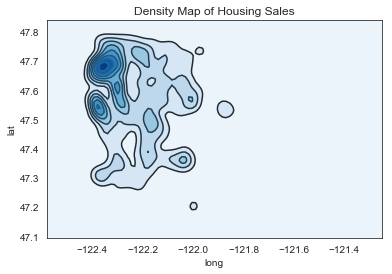

In [188]:
# 2D density plot
sns.set_style("white")
sns.kdeplot(df.long, df.lat)
 
# Some features are characteristic of 2D: 
# color palette and whether or not color the lowest range
sns.kdeplot(df.long, df.lat, cmap="Blues", shade=True, shade_lowest=True)
plt.title('Density Map of Housing Sales')
plt.show()


In [189]:
# Build cluster map to show density of house sales
mc = folium.Map([47.5112, -122.257], zoom_start=10.5, 
                min_lat=min_lat, max_lat=max_lat, 
                min_lon=min_lon, max_lon=max_lon)
locations = list(zip(df2.lat, df2.long))

#popup_content = []
#for house in df.itertuples():
#    p = "Price: {} ".format(df.price)
#    s = "Sqft: {}".format(df.sqft_living)
#    b = "Bedrooms: {}".format(df.bedrooms)
#    content = p + s + b
#    popup_content.append(content)
#popups = [folium.Popup(content) for content in popup_content]

icons = [folium.Icon(prefix="fa") for _ in range(len(locations))]

cluster = MarkerCluster(locations=locations, icons=icons, 
                        name='Cluster Map of Housing Sales')
mc.add_child(cluster)
mc.save('color_map_clusters.html')

In [223]:
# This takes a long time and sometimes crashes or shows a blank box
#mc

In [198]:
df.zipcode.unique().shape

(70,)

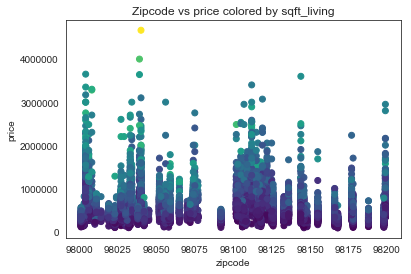

In [202]:
plt.scatter(df2['zipcode'], df2['price'], c=df2['sqft_living'], 
            cmap='viridis')
plt.title('Zipcode vs price colored by sqft_living')
plt.xlabel('zipcode')
plt.ylabel('price')
plt.show()

### Question 2 Conclusions

Open links in folder to **color_map.html** and **color_map_clusters.html** for relevant maps.

Location clearly has a big impact on price. This relationship is most evident from **color_map.html** where the most expensive properties can be seen clustered together. The scatterplot of zipcode vs price colored by sqft living also shows that some zipcodes contain a larger portion of expensive houses than others. 

I could not get my zipcode map to work. For future work, I want to create the zipcode map with the prices color coded. I would like to create centroids in each zipcode using either the average lat and average long or the PO Box map on the KC gov website. That way I could maybe use zipcode in my regression model. I think location has a huge impact on price. I am unhappy with how lat and long are currently represented in my model because it's doesn't account for regionality properly. Another strategy could be to split my lat and long data into the 4 quadrants of the map. That would not be as good as having all the zipcodes though.

[Back to the top](#Final-Project-Submission)

## Question 3

### What effect does size have on price?

I relied on feature engineering to help me answer this question. The original dataset included the following columns related to house size: 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', and 'sqft_lot15'

After examining these columns, I decided to engineer the following new columns: 
* 'total_sqft_inside' = 'sqft_above' + 'sqft_basement'
* 'total_sqft' = 'sqft_living' + 'sqft_lot'

Let's examine the relationship between these features and price.

In [219]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_sold',
       'age_when_sold', 'total_sqft_inside', 'total_sqft', 'last_updated',
       'age_since_updated'],
      dtype='object')

King County Housing DataSet - Regression Analysis  and Diagnostics for formula: price~total_sqft_inside
-------------------------------------------------------------------------------------


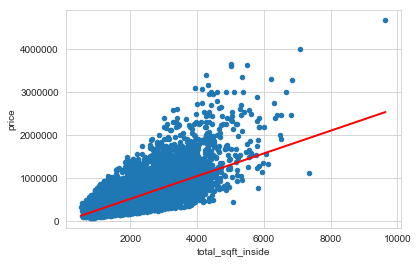

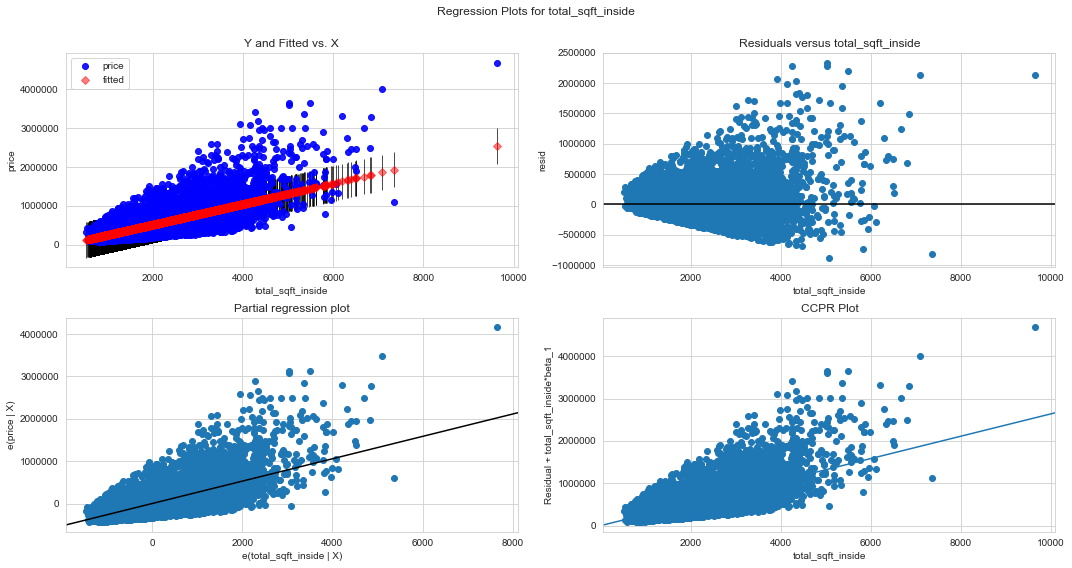

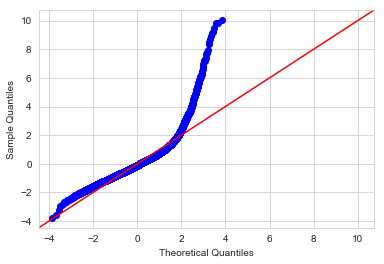

King County Housing DataSet - Regression Analysis  and Diagnostics for formula: price~total_sqft
-------------------------------------------------------------------------------------


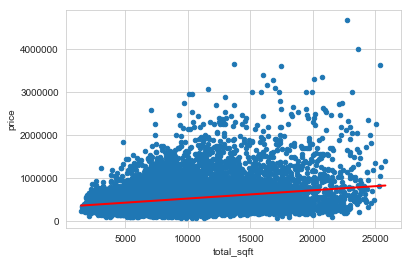

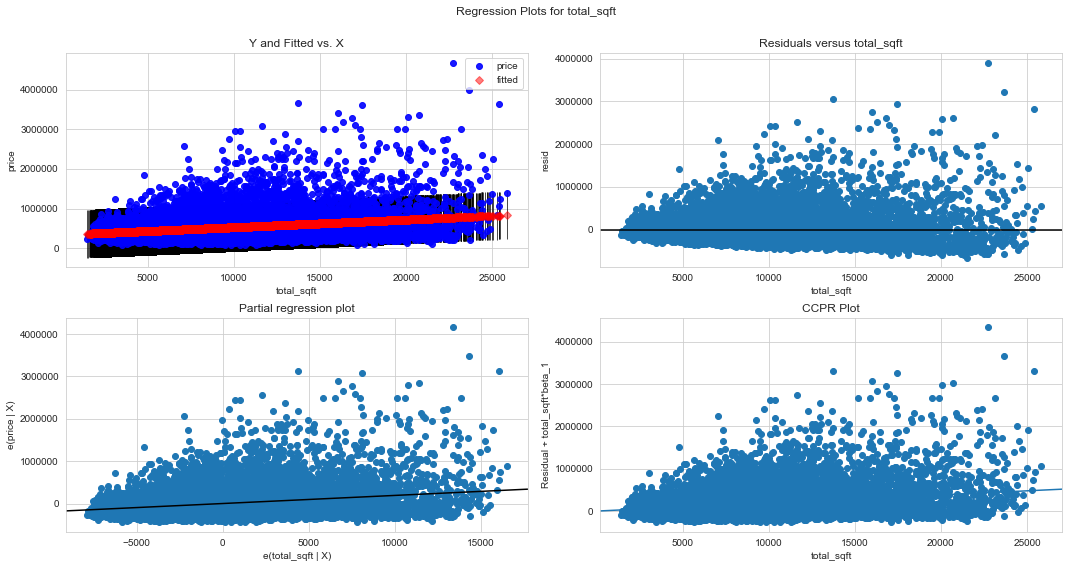

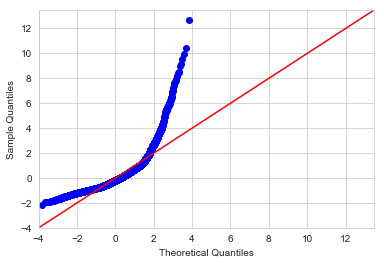

In [220]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality(JB)']]

for idx, val in enumerate(['total_sqft_inside', 'total_sqft']):
    print("King County Housing DataSet - Regression Analysis  and Diagnostics for formula: price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
    
    model = smf.ols(formula=f, data=df2).fit()
    
    X_new = pd.DataFrame({val: [df2[val].min(), df2[val].max()]});
    preds = model.predict(X_new)
    df2.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
#    input("Press Enter to continue...")

Last step, let's build a map of property locations colored by total sqft inside.

In [244]:
df2['total_sqft_inside'].describe()

count    16382.000000
mean      1979.873825
std        809.792088
min        520.000000
25%       1390.000000
50%       1840.000000
75%       2420.000000
max       9640.000000
Name: total_sqft_inside, dtype: float64

In [241]:
Q4_size_houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_when_sold,total_sqft_inside,total_sqft,age_since_updated
count,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000,1.00,1.0,1.0,1.0,1.0,1.0,1.0
mean,4670000.0,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,3.0,12.0,4820.0,4820.0,98040.0,47.557,-122.21,3270.0,10454.0,31.0,9640.0,22708.0,5.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4670000.0,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,3.0,12.0,4820.0,4820.0,98040.0,47.557,-122.21,3270.0,10454.0,31.0,9640.0,22708.0,5.0
25%,4670000.0,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,3.0,12.0,4820.0,4820.0,98040.0,47.557,-122.21,3270.0,10454.0,31.0,9640.0,22708.0,5.0
50%,4670000.0,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,3.0,12.0,4820.0,4820.0,98040.0,47.557,-122.21,3270.0,10454.0,31.0,9640.0,22708.0,5.0
75%,4670000.0,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,3.0,12.0,4820.0,4820.0,98040.0,47.557,-122.21,3270.0,10454.0,31.0,9640.0,22708.0,5.0
max,4670000.0,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,3.0,12.0,4820.0,4820.0,98040.0,47.557,-122.21,3270.0,10454.0,31.0,9640.0,22708.0,5.0


In [234]:
Q1_size_houses = df2.loc[df2['total_sqft_inside'] < 1390]
Q2_size_houses = df2.loc[(df2['total_sqft_inside'] >= 1390) & (df2['total_sqft_inside'] < 1840)]
Q3_size_houses = df2.loc[(df2['total_sqft_inside'] >= 1840) & (df2['total_sqft_inside'] < 2420)]
Q4_size_houses = df2.loc[df2['total_sqft_inside'] >= 9640]

In [235]:
m_size = folium.Map([47.5112, -122.257], zoom_start=10.5, 
                min_lat=min_lat, max_lat=max_lat, 
                min_lon=min_lon, max_lon=max_lon)

In [240]:
# Creating color coded dots for different quarters of house sizes
for index, row in Q1_size_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#ffff00",
                        popup=f"Price: {row['price']} Sqft: {row['total_sqft_inside']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m_size)
for index, row in Q2_size_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#00ff00",
                        popup=f"Price: {row['price']} Sqft: {row['total_sqft_inside']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m_size)
for index, row in Q3_size_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#05c1ff",
                        popup=f"Price: {row['price']} Sqft: {row['total_sqft_inside']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m_size)    
for index, row in Q4_size_houses.iterrows():
    folium.CircleMarker([row['lat'], row['long']],
                        radius=1,
                        color="#0000ff",
                        popup=f"Price: {row['price']} Sqft: {row['total_sqft_inside']} Bedrooms: {row['bedrooms']}",
                        fill=True# divvy color
                       ).add_to(m_size)  
m_size.save('size_color_map.html')

### Question 3 Conclusions

After running basic linear regressions for both 'total_sqft_inside' and 'total_sqft', I've determined that 'total_sqft_inside' is a much better predictor of house price. Total sqft inside is the sum of sqft above and sqft basement. Generally, larger houses sell for higher prices. 

[Back to the top](#Final-Project-Submission)

## Resolve multicollinearity

In [120]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age_when_sold', 'total_sqft_inside', 'total_sqft',
       'age_since_updated'],
      dtype='object')

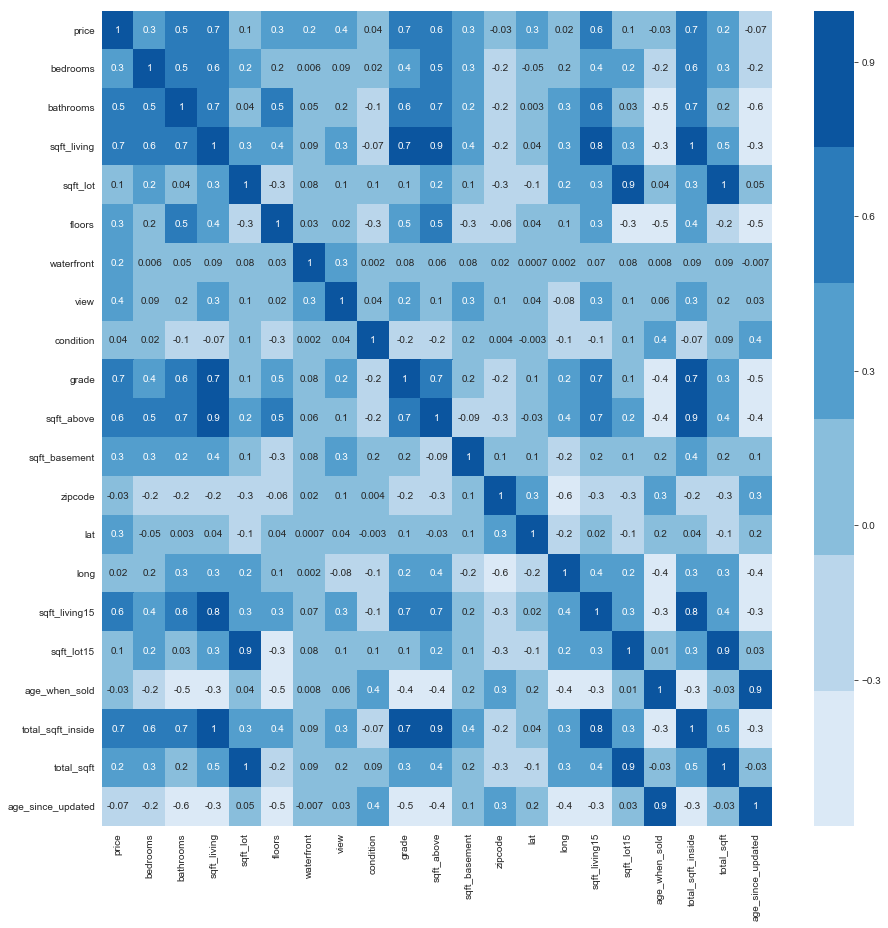

In [121]:
# Let's look at a heatmap of variables that are left
corr = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.1g', cmap=sns.color_palette('Blues'))
plt.show()

In [124]:
df3 = df2.drop(['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 
                'sqft_above', 'sqft_basement', 'bathrooms', 'age_since_updated',
                'bedrooms', 'floors', 'grade'], axis=1)

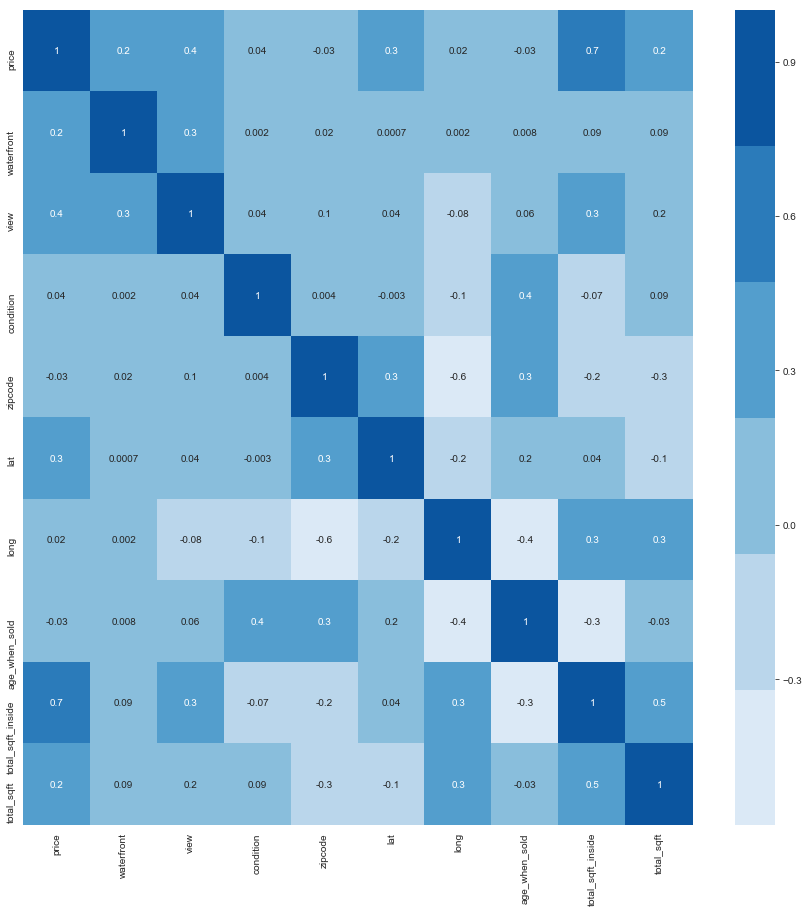

In [125]:
corr_sub = df3.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_sub, annot=True, fmt='.1g', cmap=sns.color_palette('Blues'))
plt.show()

[Back to the top](#Final-Project-Submission)

## Scale and normalize variables

Next I need to scale and normalize my continuous variables. Continuous variables include 

In [126]:
df3.columns

Index(['price', 'waterfront', 'view', 'condition', 'zipcode', 'lat', 'long',
       'age_when_sold', 'total_sqft_inside', 'total_sqft'],
      dtype='object')

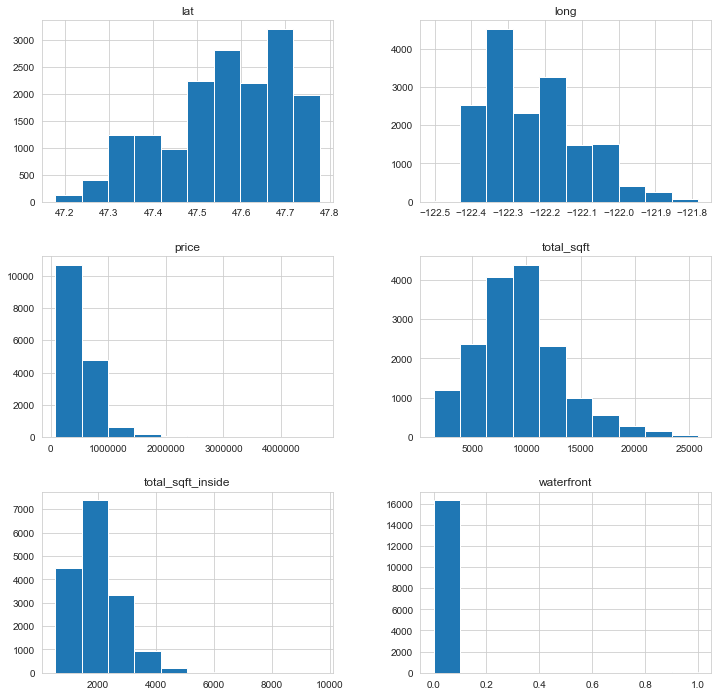

In [127]:
# First, I check out what the distribution looks like before transformation. 
df3[['price', 'waterfront', 'lat', 'long', 'total_sqft_inside', 'total_sqft']].hist(figsize = [12,12]) ;

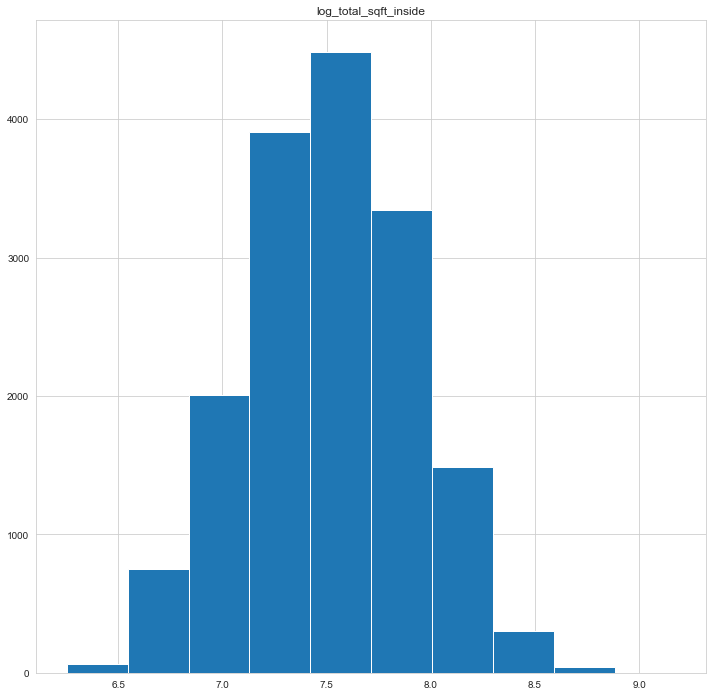

In [128]:
# Transform price, total_sqft_inside and total_sqft using log transformation
# Creating new dataframe for log transformations and plotting histograms
df_log = pd.DataFrame([])
#Going to wait on price for analysis purposes
#df_log['log_price'] = np.log(df3['price'])
df_log['log_total_sqft_inside'] = np.log(df3['total_sqft_inside'])
#df_log['log_total_sqft'] = np.log(df3['total_sqft'])
#df_log['log_age_since_updated'] = np.log(df3['age_since_updated'])

df_log.hist(figsize=[12,12]) ;

What to do with lat and long?
* Not log transformation (negative values)
* Let's try standardizing them

In [129]:
scaled = pd.DataFrame([])
lat = df3['lat']
long = df3['long']
scaled["lat"] = (lat)/(np.linalg.norm(lat))
scaled["long"] = (long)/(np.linalg.norm(long))

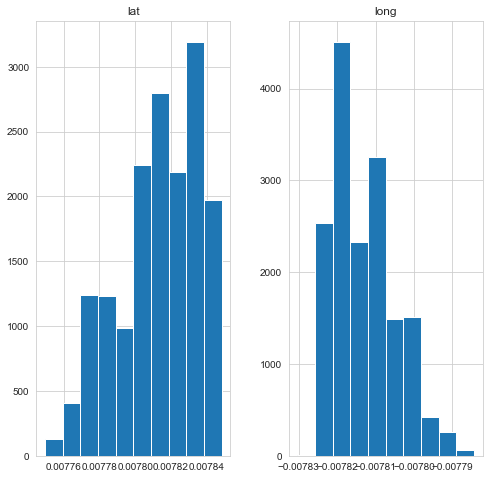

In [130]:
scaled.hist(figsize  = [8, 8]);

In [131]:
df3.columns

Index(['price', 'waterfront', 'view', 'condition', 'zipcode', 'lat', 'long',
       'age_when_sold', 'total_sqft_inside', 'total_sqft'],
      dtype='object')

In [132]:
df3['lat_scaled'] = scaled["lat"]
df3['long_scaled'] = scaled["long"]
df3['log_total_sqft_inside'] = df_log['log_total_sqft_inside']
#df3['log_total_sqft'] = df_log['log_total_sqft']
df3.head()

,price,waterfront,view,condition,zipcode,lat,long,age_when_sold,total_sqft_inside,total_sqft,lat_scaled,long_scaled,log_total_sqft_inside
1,538000.0,0.0,0.0,3,98125,47.7210,-122.319,63,2570,9812,0.007839,-0.007819,7.851661
2,180000.0,0.0,0.0,3,98028,47.7379,-122.233,82,770,10770,0.007842,-0.007813,6.646391
3,604000.0,0.0,0.0,5,98136,47.5208,-122.393,49,1960,6960,0.007806,-0.007823,7.580700
4,510000.0,0.0,0.0,3,98074,47.6168,-122.045,28,1680,9760,0.007822,-0.007801,7.426549
6,257500.0,0.0,0.0,3,98003,47.3097,-122.327,19,1715,8534,0.007771,-0.007819,7.447168


In [139]:
df_final = pd.DataFrame([])
df_final = df3.drop(['lat', 'long', 'total_sqft_inside', 'view', 
                     'condition', 'zipcode'], axis=1)

In [140]:
df_final.head()

,price,waterfront,age_when_sold,total_sqft,lat_scaled,long_scaled,log_total_sqft_inside
1,538000.0,0.0,63,9812,0.007839,-0.007819,7.851661
2,180000.0,0.0,82,10770,0.007842,-0.007813,6.646391
3,604000.0,0.0,49,6960,0.007806,-0.007823,7.580700
4,510000.0,0.0,28,9760,0.007822,-0.007801,7.426549
6,257500.0,0.0,19,8534,0.007771,-0.007819,7.447168


In [141]:
df_final.columns

Index(['price', 'waterfront', 'age_when_sold', 'total_sqft', 'lat_scaled',
       'long_scaled', 'log_total_sqft_inside'],
      dtype='object')

After transformation, all four of these continuous variables appear much better suited to a normal distribution than before. Keep in mind that this transformation will change the interpretation of the coefficients during regression.

[Back to the top](#Final-Project-Submission)

## Partition the dataset

In [142]:
# Preparing the data
X = df_final.drop(['price'], axis=1)
#X = sm.add_constant(x)
y = df_final[['price']]

# Splitting the dataset into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 10)

[Back to the top](#Final-Project-Submission)

## Create a linear regression model

In [143]:
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:13:41   Log-Likelihood:            -1.5761e+05
No. Observations:               11467   AIC:                         3.152e+05
Df Residuals:                   11461   BIC:                         3.153e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
waterfront             8.786e+05   3.21e+04     27.352      0.000    8.16e+05    9.42e+05
age_when_sold          1947.5520     75.687     25.732      0.000    1799.192    2095.912
total_sqft               -3.1982      0.592     -5.400      0.000      -4.359      -2.037
lat_scaled              3.72e+09   9.47e+07     39.283      0.000    3.53e+09    3.91e+09
long_scaled            4.147e+09    9.4e+07     44.140      0.000    3.96e+09    4.33e+09
log_total_sqft_inside  5.051e+05   6370.280     79.298      0.000    4.93e+05    5.18e+05
==============================================================================
Omnibus:                     7566.791   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177895.954
Skew:                           2.814   Prob(JB):                         0.00
Kurtosis:                      21.457   Cond. No.                     6.43e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
target = df_final['price']
df_final2 = df_final.drop(['price'], axis=1)

In [145]:
df_final2 = df_final2.drop(['total_sqft'], axis=1)

In [146]:
df_final2.columns

Index(['waterfront', 'age_when_sold', 'lat_scaled', 'long_scaled',
       'log_total_sqft_inside'],
      dtype='object')

In [147]:
# Preparing the data
X = df_final2
#X = sm.add_constant(x)
y = target

# Splitting the dataset into train and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 10)

In [148]:
linreg = sm.OLS(y_train, X_train).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                 1.428e+04
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:16:03   Log-Likelihood:            -1.5763e+05
No. Observations:               11467   AIC:                         3.153e+05
Df Residuals:                   11462   BIC:                         3.153e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
waterfront             8.687e+05   3.21e+04     27.055      0.000    8.06e+05    9.32e+05
age_when_sold          1889.6556     75.016     25.190      0.000    1742.611    2036.700
lat_scaled             3.764e+09   9.45e+07     39.846      0.000    3.58e+09    3.95e+09
long_scaled             4.18e+09   9.39e+07     44.524      0.000       4e+09    4.36e+09
log_total_sqft_inside  4.897e+05   5696.509     85.961      0.000    4.79e+05    5.01e+05
==============================================================================
Omnibus:                     7445.178   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168849.004
Skew:                           2.761   Prob(JB):                         0.00
Kurtosis:                      20.970   Cond. No.                     3.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

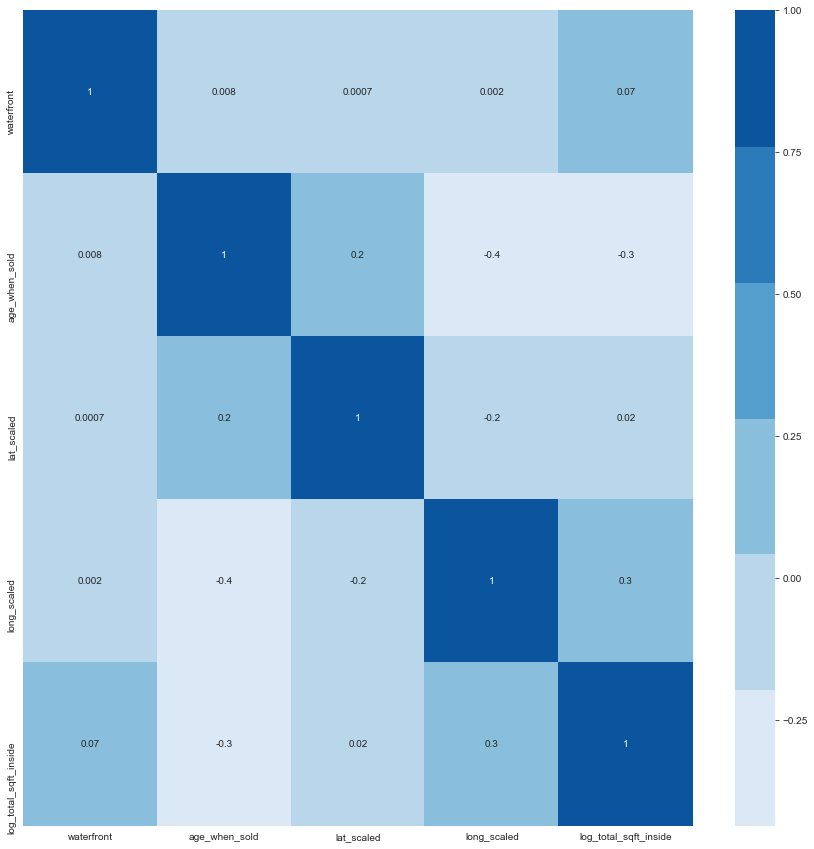

In [150]:
corr_sub = df_final2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_sub, annot=True, fmt='.1g', cmap=sns.color_palette('Blues'))
plt.show()

In [158]:
for i in range(5): 
    print(round(linreg.params[i]))

868700.0
1890.0
3763939677.0
4179706673.0
489675.0


In [153]:
df_final2.columns

Index(['waterfront', 'age_when_sold', 'lat_scaled', 'long_scaled',
       'log_total_sqft_inside'],
      dtype='object')

### Multiple Linear Regression Equation

$$price = 868700 * waterfront + 1890 * age when sold + 3763939677 * lat scaled + 4179706673 * long scaled + 489675 * log total sqft inside$$

[Back to the top](#Final-Project-Submission)

## Validate model

In [163]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

11467 4915 11467 4915


In [164]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [165]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [166]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 48355343324.23764
Test Mean Squarred Error: 45620797653.64758


Great! There doesn't seem to be a big difference between the train and test MSE.

Next let's look at the RMSE.

In [167]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Root Mean Squarred Error:', sqrt(mse_train))
print('Test Root Mean Squarred Error:', sqrt(mse_test))

Train Root Mean Squarred Error: 219898.48413356024
Test Root Mean Squarred Error: 213590.25645765677


RMSE is bigger than I would like but we'll just go with it for now.

### K-Fold Cross Validation

In [168]:
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [169]:
cv_5_results

-48119782941.5707

In [170]:
cv_10_results

-48068898699.20207

In [171]:
cv_20_results

-47792083424.44407

All values of the cross validation tests are close to my training MSE. Success!

[Back to the top](#Final-Project-Submission)

## Analysis

Below is my final multiple linear regression equation:

$$price = 868700 * waterfront + 1890 * age when sold + 3763939677 * lat scaled + 4179706673 * long scaled + 489675 * log total sqft inside$$

The main features of my model are house age, location, and size. For age, I engineered a feature from the year built and the date sold. For size, I summed the total sqft above with the total sqft basement and ran a log transformation. Location was trickier. I included waterfront even though it was a small percentage of my data because I thought it had a big enough impact. I used normalized latitude and longitude in my model to account for location. I tried to group by zipcode but was unsuccessful. 

My R squared value is 0.862 meaning my model explains 86.2% of the variability of the data around its mean. The RMSE of my model is 213590 which is the measure of how close the observed data points are to the model's predicted values. Thus my model can predict the price of a house withing $213000. There is definitely room for improvement in the fit of my model. 

[Back to the top](#Final-Project-Submission)

## Conclusion

I feel like I gained a large amount of new knowledge through this project. I was able to apply everything I've learned about processing data and building multiple regression models. I also gained a lot of outside knowledge about creating maps and graphs in python. Overall, I'm very happy with how my project turned out. There are still many areas for improvement and more work to be done. 

[Back to the top](#Final-Project-Submission)

## Future work

Here are some ideas for future work on this project: 
* Location: Group properties by zipcode. Use centroids in zipcodes to get distance from centroid. Find a way to use in regression modeling.
* Figure out how to make a regression model using grade.
* Use feature selection methods
* Create an input function where user can put in different parameter values and it would calculate the price of the house
* Check QQ Plots for linear regression assumptions
* Build residuals histogram with bell curve
* Graph actual and predicted house prices
* Make model iteration more clear (numbered models)

[Back to the top](#Final-Project-Submission)

### The code below is for a zipcode map which I could not get to work

I could not get my zipcode map to work. For future work, I want to create the zipcode map with the prices color coded. I would like to create centroids in each zipcode using either the average lat and average long or the PO Box map on the KC gov website. That way I could maybe use zipcode in my regression model. I think location has a huge impact on price. I am unhappy with how lat and long are currently represented in my model because it's doesn't account for regionality properly. Another strategy could be to split my lat and long data into the 4 quadrants of the map. That would not be as good as having all the zipcodes though. 

In [190]:
#https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.geojson

In [191]:
#df_map = df2
#df_map.head()

In [192]:
# Set zipcode type to string (folium)
#df_map['zipcode'] = df_map['zipcode'].astype('str')
# get the mean value across all data points
#zipcode_data = df_map.groupby('zipcode').aggregate(np.mean)
#zipcode_data.reset_index(inplace = True)

In [193]:
#zipcode_data = df2.groupby('zipcode').aggregate(np.mean)
#zipcode_data.reset_index(inplace=True)

#df2['count'] = 1
#count_houses_zipcode = df2.groupby('zipcode').sum()
#count_houses_zipcode.reset_index(inplace=True)
#count_houses_zipcode = count_houses_zipcode[['zipcode','count']]
#df2.drop(['count'], axis = 1, inplace = True)

#zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, how='left', on=['zipcode'])
#zipcode_data.head(2)

In [194]:
# count number of houses grouped by zipcode
#df_map['count'] = 1
#temp = df_map.groupby('zipcode').sum()
#temp.reset_index(inplace = True)
#temp = temp[['zipcode', 'count']]
#zipcode_data = pd.merge(zipcode_data, temp, on='zipcode')
# drop count from org dataset
#df_map.drop(['count'], axis = 1, inplace = True)

In [195]:
#def show_zipcode_map(col):
#    geo_path = 'zipcode/zipcode_king_county.geojson'
#    zipcode = folium.Map(location=[df2['lat'].mean(), df2['long'].mean()], zoom_start=9)
#    zipcode.geo_json(geo_path = geo_path,
#                     data=zipcode_data, 
#                     columns = ['zipcode', col], key_on = 'feature.properties.ZCTA5CE10',
#                 fill_color='OrRd', fill_opacity=0.9,line_opacity=0.2)
#    zipcode.save(col + '.html')
#    return zipcode

In [196]:
#show_zipcode_map(['price'])


In [197]:
# zip codes with po box as centroid

# https://opendata.arcgis.com/datasets/02a7fd7667214af88303f0c1cf580099_2013.geojson

In [150]:
#df.plot(kind="scatter", x=df['long'], y=df['lat'], alpha=0.2)

In [200]:
# Maybe try making bins for zipcodes based on the average house prices.

#zipcode_data = df2.groupby('zipcode').aggregate(np.mean)
#zipcode_data.reset_index(inplace=True)

#df2['count'] = 1
#count_houses_zipcode = df2.groupby('zipcode').sum()
#count_houses_zipcode.reset_index(inplace=True)
#count_houses_zipcode = count_houses_zipcode[['zipcode','count']]
#df2.drop(['count'], axis = 1, inplace = True)

#zipcode_data = pd.merge(zipcode_data, count_houses_zipcode, 
#                        how='left', on=['zipcode'])
#zipcode_data.head()

[Back to the top](#Final-Project-Submission)

Goals for what my analysis could someday be:

https://www.kaggle.com/harlfoxem/house-price-prediction-part-1